## Intro to Plot Data with Python
Matplot lib is the most common plotting utlity for python.  In gereneral, plotting with python works very well from small data, but doesn't scale much beyond a few thousand rows.
Most plotting methofd in python are actually using matplot lib under the hood

Data to be used the sklearn boston housing data
https://scikit-learn.org/stable/datasets/index.html#boston-dataset


There are two APIs for matplotlib 
+ object oriented ```fig, ax = plt.subplots()```
+ matplotlib ```plt.figure()```


+ ```plt.show()``` displays the model

+ ```fig.savefig('myimage.png'``` saves the image to a file
+ ```%matplotlib inline``` allows images to displayed in jupyter notebools

Color maps are availible at https://matplotlib.org/examples/color/colormaps_reference.html


Plotting Methods for Continous Variables

+ Correlation Plots
+ Scatter Plots
+ Histograms / Density Plots
+ Interaction Counter Plots
+ 3D Scatter Plots
+ 3D Counter Plits


### Correlation Plots 
Best used with continoud variables, to find positive and negative relationships, especially with colots of continous variables 
+ generall guide lindes (use sort variable names, long ones get cut off or otherwise difficult to read)
+ Use Cool Warm color palet where blue is negative, and red is positive (white shows little correlation)
+ Include correlation numbers on blocks, 
+ becomes very difficult to read, past about 10 variables
+ leverage self organization if possible


In [9]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
b = load_boston()

feature_names = b.feature_names
df = pd.DataFrame(b.data, columns=feature_names)
df['price'] = b.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [10]:
## Correlation Plots
corr = df.corr()  ## create a correlation matrix
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Conclusions 
+ LSTAT % lower status of the population negatively correlated to price
+ RM average number of rooms per dwelling is positively correlated with price. 

### Scatter Plots 
Use Scatter plots to describe relationshio between two continous variables
+ Works well when there is actually a linear relationship
+ Outliers can negatively effect plot
+ With large data sets, plot only a sample
+ Handels very large col names, since the can be put parallel with the x and y axis
+ Use Colors, and Size to add aditional continous dimensions
+ Use shape or color to and catagorical Dimensions 
+ Use color maps to control the pallet (cmap)

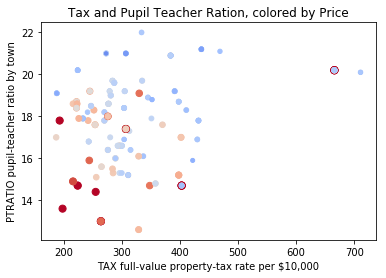

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

x = df.TAX
x_lab = 'TAX full-value property-tax rate per $10,000'
y_lab = 'PTRATIO pupil-teacher ratio by town'
y = df.PTRATIO
s = df.price ## scale (point size)
c = df.price  ## color

## Plotting script
plt.scatter(x, y, s, c, cmap ='coolwarm')
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title('Tax and Pupil Teacher Ration, colored by Price')
plt.show()

Concluesions
+ Expensive housing tends to cluster where  pupile to teacher rates are low, and property tax is low

#### Histograms
Histograms plots are used to show where the data is centered and generally only look at one or two variables at a time


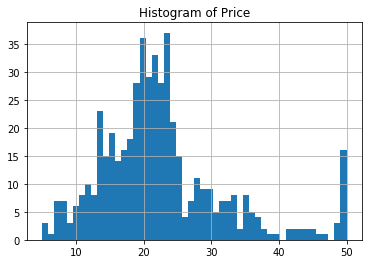

In [12]:
## Pandas has a Histogram method built in
## matplot lib methods can be used to add things like titles
df['price'].hist(bins = 50)
plt.title('Histogram of Price')
plt.show()

Conclusion
most prices are centered around the 20s, with a few outliers at 50

## Exploring Interactions of Model 
suppose that you wanted to investigate the combined effector of Tax and Pupile Teacher rations.  Countour plots are a good options
+ Explores interaction between two variables, in a predictive model
+ requeires creating synthentic data using min and max  values as well as meshgrids
+ Meshgrids create a an array of every possible combination of input arrays

In [13]:
## Can be COmbined with Predictive Models
from sklearn.tree import DecisionTreeRegressor
features = df[['TAX', 'PTRATIO']].values
labels = df['price']
model = DecisionTreeRegressor().fit(features, labels)


In [15]:

step_size = 1

# get the mins and max values for the 
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

# create two arrays of every possible combination of input arrays
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

# here "model" is your model's prediction (classification) function
# combines xx, yy into a synthetic features array, predictys 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z =  np.reshape(Z, (xx.shape))
            
# Put the result into a color plot

xx_rav = xx.ravel()
yy_rav = yy.ravel()
z_rav = Z.ravel()
print('Z shap: {}'.format(Z.shape))
print('xx shap: {}'.format(xx.shape))
print('yy shap: {}'.format(yy.shape))

Z shap: (12, 526)
xx shap: (12, 526)
yy shap: (12, 526)


#### 2D Contour Plotting
Finds uses model to estimate interaction between two variables
+ Demonstates nolinear interactions on tree models
+ Can suggest over fitting (if model looks like a jigsaw puzzel)
+ Can be missleading when infering in regions where there is no training data
+ Takes 2 dimensional input


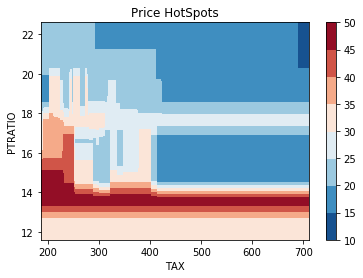

In [16]:
fig, ax = plt.subplots()
ctr = ax.contourf(xx, yy, Z, cmap="RdBu_r")
ax.set_xlabel('TAX')
ax.set_ylabel('PTRATIO')
ax.set_title('Price HotSpots')
fig.colorbar(ctr, ax=ax)
plt.show()

### 3 D Scatter Ploting
+ Can show interactiona of variables
+ best used color and height are used to reifornce eachother
+ Often very difficult to interperate, but sometimes is very appropriate (if x, y are lat and lon for example)
+ takes 1d input

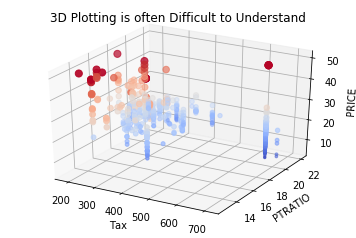

In [17]:
from mpl_toolkits.mplot3d import Axes3D


xs = df.TAX
x_lab = 'TAX full-value property-tax rate per $10,000'
y_lab = 'PTRATIO pupil-teacher ratio by town'
ys = df.PTRATIO
s = df.price ## scale (point size)
c = df.price  ## color
zs = df.price

## Plotting script

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = xs, ys=ys, zs=zs, zdir='z', s=s,  c = c, cmap ='coolwarm')

ax.set_xlabel('Tax')
ax.set_ylabel('PTRATIO')
ax.set_zlabel('PRICE')
ax.set_title('3D Plotting is often Difficult to Understand')
plt.show()

### 3D Contour Plotting
+ can suggest over fitting, if looks very choppy
+ color and height reiforce the third dimension
+ often difficult to to interprate, or messy

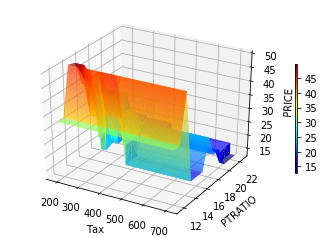

In [18]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('Tax')
ax.set_ylabel('PTRATIO')
ax.set_zlabel('PRICE')
surf = ax.plot_trisurf(xx_rav, yy_rav, z_rav , cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=50)    
plt.show()